In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign the measurement class to a variable called `measurement`
Measurement = Base.classes.measurement

# Assign the station class to a variable called `station`
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

In [8]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236d5b3a548>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [9]:
# Display the second row's columns and data in dictionary format
first_row1 = session.query(Station).first()
first_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236d5b5d548>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [10]:
# Create our session (link) from Python to the DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Climate Analysis

Text(41.1, 0.5, 'Precipitation (Inches)')

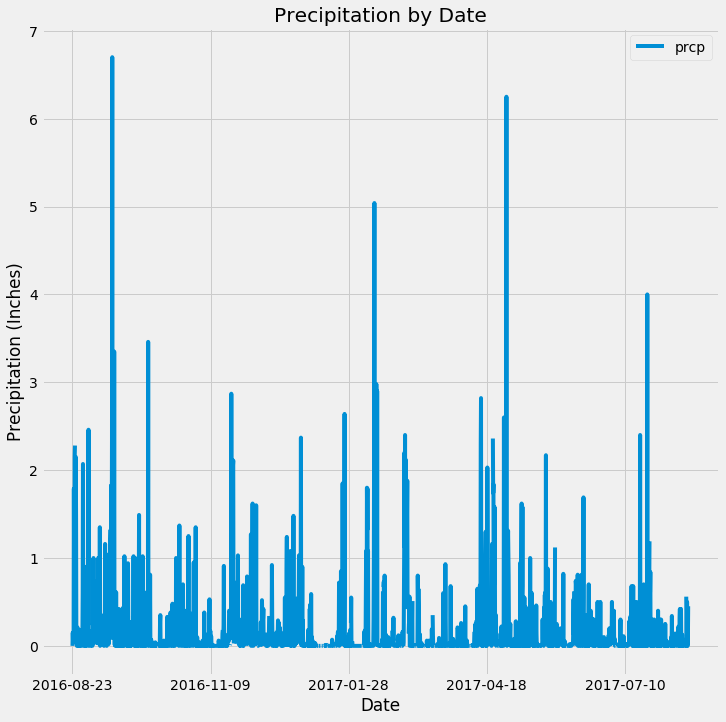

In [34]:
# Query to retrieve the last 12 months of precipitation data and plot the results
Precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

#SHOULD WE DROP NA? THERE ARE SOME NONE VALUES, IF SO HOW?????


#ROTATE THE X AXIS?????????

Precipitation_plot = pd.DataFrame(Precipitation, columns=['date', 'prcp'])
Precipitation_plot.set_index('date', inplace=True)
Precipitation_plot.plot.line(figsize=(10,10))
plt.tight_layout()

plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")


In [46]:
# Calculate the date 1 year ago from the last data point in the database

Most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

Year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
Year_ago

datetime.date(2016, 8, 23)

In [49]:
# Perform a query to retrieve the data and precipitation scores
Precipitation_stats = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
Precipitation_stats_table = pd.DataFrame(Precipitation_stats, columns=['station', 'date', 'prcp', 'tobs'])
Precipitation_stats_table.head()

# Sort the dataframe by date (TECHNICALLY THIS IS ALREADY DONE BY MY ORDER BY RIGHT????????)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00513117,2010-01-01,0.28,67.0
2,USC00518838,2010-01-01,0.21,72.0
3,USC00519523,2010-01-01,0.15,75.0
4,USC00519281,2010-01-01,0.15,70.0


In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
